In [142]:

import pandas as pd
import numpy as np
import main as fca
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from importlib import reload
import warnings
#import laz as fca
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [143]:
column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size',
        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data = 'breast-cancer-wisconsin.data'
df = pd.read_csv(data, names=column_names)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [144]:
(df['Bare Nuclei'] == '?').sum() #checking for rows with ? in it

16

In [145]:
df = df[df['Bare Nuclei'] != '?'] #dropping rows with ? present in it

In [146]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64') #we have all the features in numerical value.

In [147]:
df = df.drop(['Sample code number'], axis=1) #since we don't need code number so dropping it from the table
#df = df.select_dtypes(exclude=['object'])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [148]:
df.loc[df['Class'] == 2, 'Class'] = 0 #updating target labels
df.loc[df['Class'] == 4, 'Class'] = 1

In [149]:
df = df.dropna()
cols = list(df.columns)
cols.remove('Class')
X = df.loc[:,cols]
y = df.Class
X.shape,y.shape

((683, 9), (683,))

In [150]:

X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]

In [151]:
data = X

In [152]:
intervals = 5
names = ['Clump Thickness','Uniformity of Cell Size',
        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
for attr in names:
    min_val = data[attr].min()
    max_val = data[attr].max()
    gap = max_val - min_val
    k = 0
    for i in np.linspace(min_val + gap / intervals, max_val - gap / intervals, intervals):
        data[attr + '_' + str(k)] = (data[attr] >= i).astype(int)
        k += 1
    data = data.drop(attr, axis=1)
    

In [153]:
data.head()

,Clump Thickness_0,Clump Thickness_1,Clump Thickness_2,Clump Thickness_3,Clump Thickness_4,Uniformity of Cell Size_0,Uniformity of Cell Size_1,Uniformity of Cell Size_2,Uniformity of Cell Size_3,Uniformity of Cell Size_4,...,Normal Nucleoli_0,Normal Nucleoli_1,Normal Nucleoli_2,Normal Nucleoli_3,Normal Nucleoli_4,Mitoses_0,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_4
304,1,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
149,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,0
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
y[:10]

304    1
149    1
217    0
120    0
314    0
389    0
369    0
163    0
349    1
596    0
Name: Class, dtype: int64

In [155]:
from importlib import reload
reload(fca)
from sklearn import model_selection
from datetime import datetime
#columns = list(data.columns)
#columns.remove('Class')
X=data
#X = data.loc[:, columns]
#y = data.Class

results = {'accuracy': [], 'precision': [], 'recall': [], 'seconds': []}
for k in range(2):

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=k)

    fca.fitClassifier(X_train, y_train,threshold=0.000001)

    s = datetime.now()
    y_pred = fca.predict(X_test,'minus')
    f = datetime.now()

    results['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    results['precision'].append(metrics.precision_score(y_test, y_pred))
    results['recall'].append(metrics.recall_score(y_test, y_pred))
    results['seconds'].append((f - s).seconds)

print(pd.DataFrame(results))
print()
print('Accuracy:', pd.DataFrame(results)['accuracy'].mean())

   accuracy  precision  recall  seconds
0  0.546341   0.415094     1.0       40
1  0.629268   0.500000     1.0       39

Accuracy: 0.5878048780487806


In [156]:
#Let's dive in doing the ML model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,plot_roc_curve,classification_report

In [157]:
def check_model_results(model,X_train, X_test, y_train, y_test):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    #Confussion Matrix on 
    print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
    # Accuracy
    print("Accuracy: ",accuracy_score(y_test, y_pred))
    # Recall
    print("Recall: ",recall_score(y_test, y_pred, average=None))
    # Precision
    print("Precision Score: ",precision_score(y_test, y_pred, average=None))
    print("Classification Report: \n",classification_report(y_test,y_pred))
    print(plot_roc_curve(model,X_test,y_test))

NaiveBayes
Confusion Matrix: 
 [[128   1]
 [  1  75]]
Accuracy:  0.9902439024390244
Recall:  [0.99224806 0.98684211]
Precision Score:  [0.99224806 0.98684211]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       0.99      0.99      0.99        76

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

RandomForest
Confusion Matrix: 
 [[128   1]
 [  2  74]]
Accuracy:  0.9853658536585366
Recall:  [0.99224806 0.97368421]
Precision Score:  [0.98461538 0.98666667]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       129
           1       0.99      0.97      0.98        76

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.98       205
weighted avg       0.99      0.

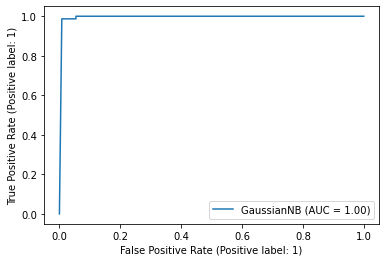

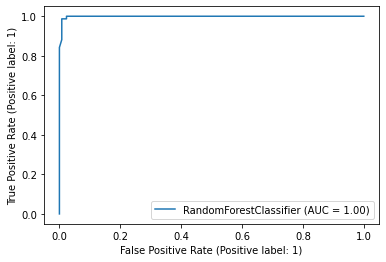

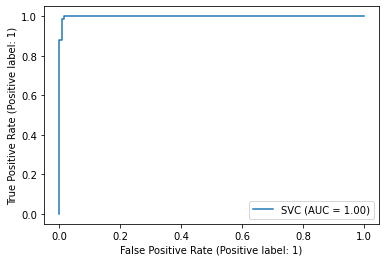

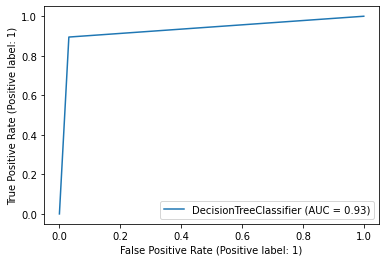

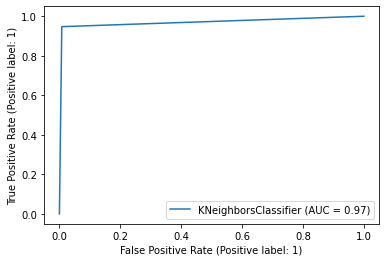

In [158]:
models =  {
    'NaiveBayes':GaussianNB(),
    'RandomForest':RandomForestClassifier(n_estimators = 110),
    'SupportVectorMachine':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'KNeighboors':KNeighborsClassifier(1)
}
for key,model in models.items():
    print(key)
    check_model_results(model,X_train, X_test, y_train, y_test)